# Clustering Based on Neural Networks in Wireless Sensor Networks

## 1. Using Random Points and Clustering with KMeans 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [2]:
# Generate random nodes for wsn
# We will assume that these points give out signals to the nodes

x1 = 10*np.random.rand(100,2)
print("x1 shape is",x1.shape)
print(x1)
# np.savetxt("rand_dataset.csv",x1,delimiter=",")

x1 shape is (100, 2)
[[3.57338157 4.03697936]
 [6.63206048 2.13867472]
 [3.58984138 3.28198035]
 [8.05746042 4.10019404]
 [0.63008121 6.4346263 ]
 [4.07515776 4.40808547]
 [5.91060792 4.68799476]
 [3.26351367 7.47286204]
 [3.25563505 9.69330173]
 [6.77184701 3.90985097]
 [5.69083694 1.0485965 ]
 [3.32165631 7.76393881]
 [8.17576122 6.3075311 ]
 [7.03448674 3.67058772]
 [2.82586902 0.46571705]
 [0.11491751 4.94455463]
 [9.39532057 2.04892877]
 [9.70793888 5.78973011]
 [3.12578593 1.36885425]
 [2.33417338 2.56526517]
 [4.79402869 5.42524779]
 [8.52371138 7.27623349]
 [0.72786037 0.14161135]
 [7.36484453 8.5171446 ]
 [6.72467872 5.61130106]
 [9.60615973 7.58391158]
 [5.64468372 4.69731955]
 [5.38546825 8.76517366]
 [8.13542018 4.10447848]
 [6.41768431 9.72176071]
 [9.79122679 1.52522305]
 [9.16022629 9.31255043]
 [8.36530111 1.19941747]
 [0.81513318 5.40745519]
 [0.87676791 5.80753874]
 [5.9026921  8.73507249]
 [0.14888825 8.57892466]
 [1.32588845 4.48747602]
 [0.02011744 5.78411089]
 [1.

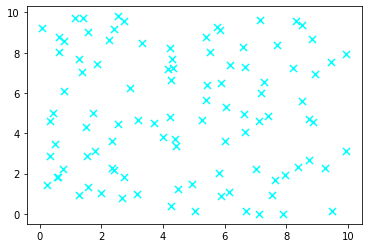

In [3]:
plt.scatter(
    x1[:,0],x1[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

In [4]:
#Here let us take 4 main nodes to which the signals are sent 
kmean = KMeans(n_clusters=3)
km = kmean
kmean.fit(x1) #Fitting our clusters using KMeans Algorithm

KMeans(n_clusters=3)

In [5]:
kmean.cluster_centers_

array([[4.09411413, 8.23643004],
       [7.66741707, 3.57192449],
       [2.3277698 , 2.79794881]])

In [6]:
y_km = kmean.labels_

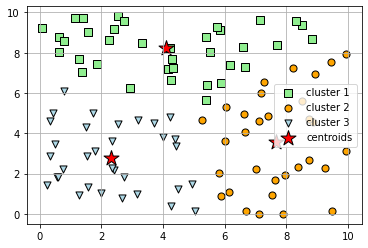

In [7]:
plt.scatter(
    x1[y_km == 0, 0], x1[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    x1[y_km == 1, 0], x1[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    x1[y_km == 2, 0], x1[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

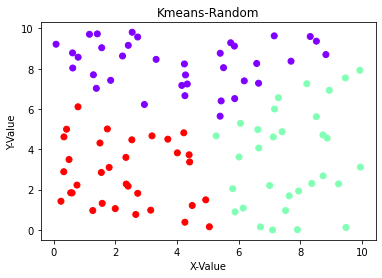

In [8]:
plt.scatter(x1[:,0],x1[:,1],c=y_km,cmap = 'rainbow')
plt.title("Kmeans-Random")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("kmeans_rand.jpg")
# plt.legend()  

Cluster 1 Inertia 1720.2969431077731
Cluster 2 Inertia 1026.1887877117845
Cluster 3 Inertia 656.3180428062656
Cluster 4 Inertia 387.34991866074245
Cluster 5 Inertia 312.5545784235567
Cluster 6 Inertia 257.40288929920825
Cluster 7 Inertia 215.38722684186698
Cluster 8 Inertia 173.78347302964212
Cluster 9 Inertia 148.71842591374795
Cluster 10 Inertia 136.19150261472456
Cluster 11 Inertia 124.15990926838101
Cluster 12 Inertia 111.46701650560239
Cluster 13 Inertia 104.66012129676884
Cluster 14 Inertia 91.25573663110353
Cluster 15 Inertia 86.68563265097842
Cluster 16 Inertia 79.72355403077755
Cluster 17 Inertia 71.3663151000254
Cluster 18 Inertia 68.23960860185353
Cluster 19 Inertia 61.04694880963729


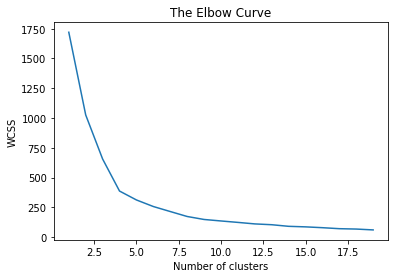

In [9]:
wcss = []
for i in range(1,20):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
 kmeans.fit(x1)
 wcss.append(kmeans.inertia_)
 print("Cluster", i, "Inertia", kmeans.inertia_)
plt.plot(range(1,20),wcss)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

- The above plot tells us that 3 clusters are not appropriate enough due to the elbow forming after 3 and somewhere around 5 and the improvement becomes very less there after. So we need more nodes.

---
# 2. Using Cluster Blobs and Clustering with KMeans


In [6]:
df = pd.read_csv("rand_dataset.csv")
df.head()

,x,y
0,3.573382,4.036979
1,6.632060,2.138675
2,3.589841,3.281980
3,8.057460,4.100194
4,0.630081,6.434626


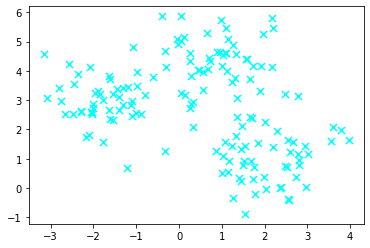

[1 0 0 0 1 0 0 1 2 0 1 2 2 0 0 2 2 1 2 1 0 1 0 0 2 1 1 0 2 1 2 2 2 2 0 1 1
 1 0 0 2 2 0 1 1 1 2 0 2 0 1 0 0 1 1 2 0 1 2 0 2 2 2 2 0 2 0 1 0 0 0 1 1 0
 1 0 0 2 2 0 1 1 0 0 1 1 1 2 2 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 0 2 0 0 0 2
 0 1 2 0 2 0 0 2 2 0 1 0 0 1 1 2 1 2 2 2 2 1 2 2 2 0 2 1 2 0 0 1 1 2 2 2 2
 1 1]


In [3]:
#sample wsn points
X,y = make_blobs(
    n_samples=150 ,n_features=2,
    centers=3,cluster_std=0.8,
    shuffle=True, random_state=0
)
# np.savetxt("blobs_dataset.csv",X,delimiter=",")
#plot of sample wsn points

plt.scatter(
    X[:,0],X[:,1],
    c='cyan',marker='x',
    edgecolors='black',s=50
)

plt.show()
print(y)

In [11]:
#Applying clustering assuming 3 nodes

km = KMeans(
    n_clusters=3,init='random',
    n_init=10,max_iter=300,
    tol=1e-04,random_state=0
)

y_km = km.fit_predict(X)

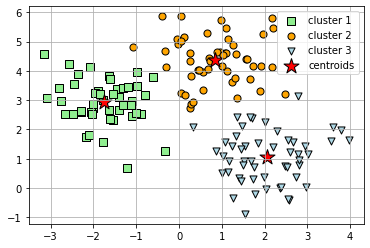

In [12]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X[y_km == 2, 0], X[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

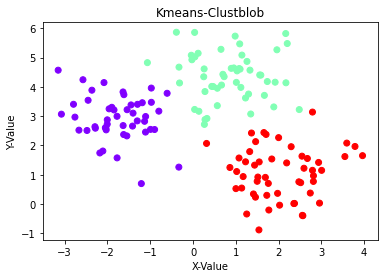

In [13]:
plt.scatter(X[:,0],X[:,1],c=y_km,cmap = 'rainbow')
plt.title("Kmeans-Clustblob")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("kmeans_blob.jpg")
# plt.legend()  

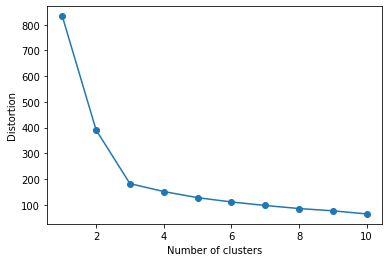

In [14]:
# Using Elbow method to determine appropriate number of clusters

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

- The above plot tells us that 3 clusters are appropriate enough due to the elbow forming at 3 and the improvement becomes very less there after

---
# 3. Using Hierarchical Clustering to cluster the points

In [15]:
from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt

[[ 2.9349952   1.42187464]
 [ 0.26604148  2.71915015]
 [ 0.69794036  4.4288665 ]
 [ 0.25989683  4.61330933]
 [ 2.95657626  0.03371845]
 [ 1.96050262  5.26569121]
 [ 2.20249345  5.47927434]
 [ 2.56737274 -0.39590118]
 [-2.47799142  2.51242918]
 [ 2.16687183  5.82049867]
 [ 3.78585628  1.96688602]
 [ 0.31622934  2.0698696 ]
 [-2.03685363  2.60006481]
 [ 0.56854833  3.95332789]
 [-0.3278886   4.67401313]
 [-2.28246102  2.58984251]
 [-1.44872404  3.38424521]
 [ 1.75992205  0.70616032]
 [-1.63320848  2.67964956]
 [ 2.02384127 -0.03681114]
 [ 0.43830172  4.0161448 ]
 [ 2.67269996  1.55646698]
 [ 1.22672424  3.62051074]
 [ 1.09150494  5.46720613]
 [-1.11005211  2.45725189]
 [ 2.47388885  0.76042659]
 [ 2.54653102  1.635429  ]
 [ 1.34880003  3.07479238]
 [-3.15145159  4.56947655]
 [ 1.1372926   0.54740762]
 [-1.63566377  3.82739535]
 [-2.00475687  2.72754488]
 [-0.89784164  2.54474698]
 [-1.89778079  3.30306744]
 [-0.02596621  4.92577961]
 [ 1.46361712  2.13207534]
 [ 3.54931469  1.62249939]
 

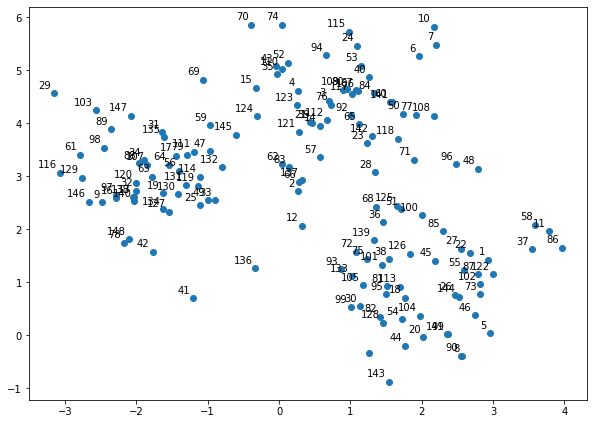

In [16]:
X,y_true = make_blobs(
    n_samples=150 ,n_features=2,
    centers=3,cluster_std=0.8,
    shuffle=True, random_state=0
)
print(X)
print(y)
labels = range(1, 150)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()

In [17]:
help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1-D condensed distance matrix
    or a 2-D array of observation vectors.
    
    If y is a 1-D condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector, where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents t

math::
           d(u,v) = \min(dist(u[i],v[j]))

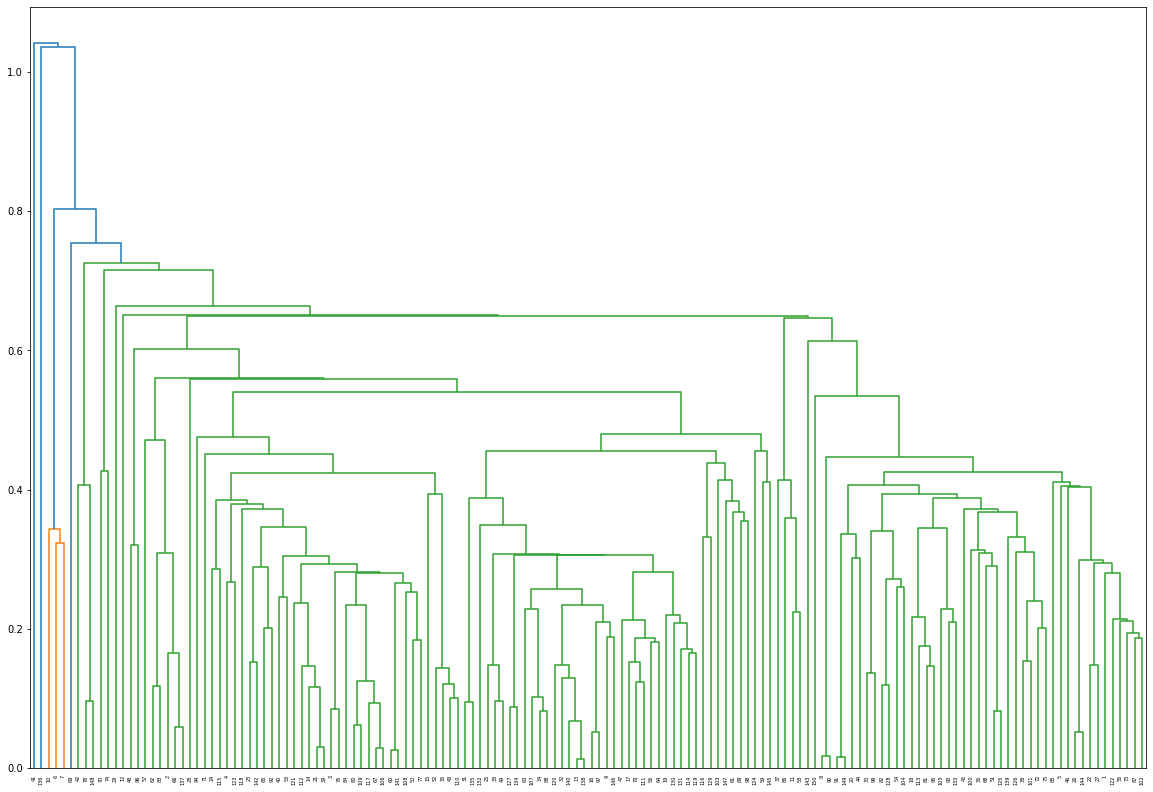

In [18]:
linked = linkage(X,'single',metric='euclid')

labelList = range(1,151)

plt.figure(figsize=(20,14))
dendrogram(linked,orientation='top',labels=labelList,distance_sort='descending',show_leaf_counts = True)
plt.show()

In [19]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_pred = cluster.fit_predict(X)

In [20]:
y_true==y_pred

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,

- We can see above that a lot of points have been clustered correctly and agglomerative clustering has worked

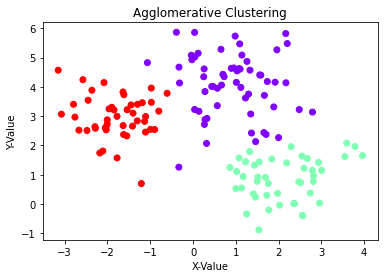

In [21]:
plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap = 'rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("agglo_clust.jpg")
plt.show()

---
## 4. Using Neural Networks for Clustering using SOM - Self Organizing Maps (Kohonen Neural Network)

In [22]:
num_clust = 3
W = []
M = len(X)
N = len(X[0])

In [23]:
def get_weights():
    y = np.random.random() * (2.0/np.sqrt(M))
    return 0.5 - (1/np.sqrt(M)) + y

In [24]:
for i in range(num_clust):
    W.append(list())
    for j in range(N):
        W[i].append(get_weights()*0.5)

In [25]:
def distance(w, x): #euclid distance
    r = 0
    for i in range(len(w)):
        r = r + (w[i] - x[i])*(w[i] - x[i])
    
    r = np.sqrt(r)
    return r

In [26]:
def Findclosest(W, x):
    wm = W[0]
    r = distance(wm, x)
    
    i = 0
    i_n = i
    
    for w in W:
        if distance(w, x) < r:
            r = distance(w, x)
            wm = w
            i_n = i
        i = i + 1
    
    return (wm, i_n)

In [27]:
print(W)

[[0.26259656047629953, 0.27171950155918156], [0.23903157522795476, 0.2476354875640435], [0.27714965360975724, 0.2717730878522704]]


In [28]:
la = 0.3    # λ coefficient
dla = 0.05  # Δλ

while la >= 0:
    for k in range(10):
        for x in X:
            wm = Findclosest(W, x)[0]
            for i in range(len(wm)):
                wm[i] = wm[i] + la * (x[i] - wm[i]) 

    la = la - dla

In [29]:
y_km

array([2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 2, 2, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2,
       1, 1, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0,
       0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 2, 2], dtype=int32)

In [30]:
final_clust = []
for x in X:
    c = Findclosest(W,x)[1]
    final_clust.append(c)
final_clust=np.array(final_clust)
print((final_clust))

[0 2 2 2 0 2 2 0 1 2 0 0 1 2 2 1 1 0 1 0 2 0 2 2 1 0 0 2 1 0 1 1 1 1 2 0 0
 0 2 2 1 1 2 0 0 0 1 2 1 2 0 2 2 0 0 1 2 0 1 2 1 2 1 1 2 2 2 0 1 2 2 0 0 2
 0 2 2 1 1 2 0 0 2 2 0 0 0 1 1 0 0 2 0 2 0 2 1 1 0 0 0 0 1 0 0 2 1 2 2 2 1
 2 0 1 2 1 2 2 1 1 2 0 2 2 0 0 1 0 1 1 1 1 0 1 1 0 2 1 0 1 2 2 0 0 1 1 1 1
 0 0]


In [31]:
final_clust

array([0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0,
       2, 2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0,
       0, 0, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 0, 2, 2, 0, 0, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 0, 1, 2, 1, 2, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 1, 1, 1, 0, 0])

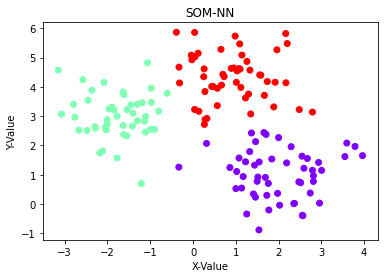

In [32]:
plt.scatter(X[:,0],X[:,1],c=final_clust,cmap = 'rainbow')
plt.title("SOM-NN")
plt.xlabel("X-Value")
plt.ylabel("Y-Value")
plt.savefig("som_nn.jpg")
plt.show()
# plt.legend()  